In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from fastai.vision.all import *

In [4]:
import fastbook
fastbook.setup_book()

from fastbook import * 
from fastai.basics import *
from fastai.vision.all import *
from fastai.vision.core import *
from fastai.vision.data import *
from fastai.data.all import *

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}', 
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)
learn = unet_learner(dls, resnet34, metrics=Dice())
learn.fine_tune(8)

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,dice,time
0,3.020330,2.429369,17.640407,00:49


epoch,train_loss,valid_loss,dice,time
0,1.749238,1.535494,15.346804,00:52
1,1.521337,1.248283,15.555757,00:48
2,1.447868,1.145352,16.162049,00:51
3,1.304315,0.910268,17.332443,00:55
4,1.181350,0.815669,17.946684,00:46
5,1.071417,0.786000,17.902550,00:48
6,0.981012,0.744032,18.281281,00:53
7,0.911676,0.742154,18.210035,00:49


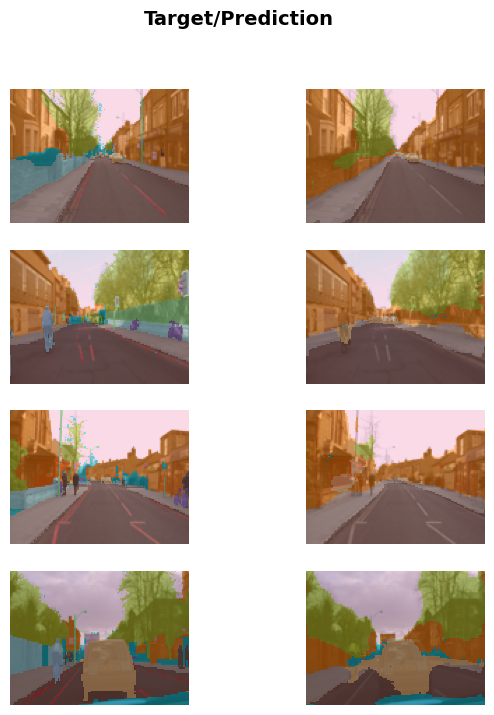

In [6]:
learn.show_results(max_n=4,figsize=(7,8))

In [11]:
#Tabular analysis - income prediction

from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls=TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names="salary",
                                
		cat_names=['workclass','education','marital-status','occupation',
					'relationship',
					],
		cont_names = ['age','fnlwgt','education-num'],
procs=[Categorify,FillMissing,Normalize]
                                )

In [12]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,education-num_na,age,fnlwgt,education-num,salary
0,Private,Masters,Never-married,Exec-managerial,Not-in-family,False,28.000000,177118.999797,14.0,<50k
1,Local-gov,HS-grad,Married-civ-spouse,Other-service,Husband,False,50.000000,212685.000109,9.0,<50k
2,Self-emp-inc,5th-6th,Married-civ-spouse,Farming-fishing,Husband,False,58.999999,133201.000665,3.0,<50k
3,Private,Some-college,Divorced,Prof-specialty,Not-in-family,False,38.000000,161016.000591,10.0,<50k
4,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,False,35.000000,32126.004436,13.0,<50k
5,Private,Some-college,Never-married,Handlers-cleaners,Own-child,False,19.000000,214935.000042,10.0,<50k
6,State-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,False,25.000000,108542.002672,10.0,<50k
7,Private,HS-grad,Divorced,Exec-managerial,Not-in-family,False,56.000000,208415.000460,9.0,<50k
8,Private,12th,Never-married,Other-service,Own-child,False,19.999999,190272.999985,8.0,<50k
9,Private,9th,Married-civ-spouse,Craft-repair,Husband,False,63.000000,66634.001709,5.0,<50k


In [19]:
learn=tabular_learner(dls,metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.365669,0.382288,0.824324,00:07
1,0.355632,0.363256,0.831542,00:05


In [21]:
#Collabrative filtering system
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [25]:
dls.show_batch()

,userId,movieId,rating
0,605,2028,3.0
1,480,858,4.0
2,187,1073,4.0
3,380,47,5.0
4,130,1270,4.0
5,355,1200,5.0
6,95,1210,5.0
7,187,1,4.0
8,518,500,4.0
9,382,7153,4.0


In [27]:
learn = collab_learner(dls,y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.507614,1.447530,00:01


epoch,train_loss,valid_loss,time
0,1.378457,1.391050,00:00
1,1.272544,1.215370,00:00
2,1.047020,0.905302,00:00
3,0.807785,0.750325,00:00
4,0.701157,0.709723,00:00
5,0.658226,0.697139,00:00
6,0.621747,0.691129,00:00
7,0.614478,0.688626,00:00
8,0.600259,0.687233,00:01
9,0.606190,0.687030,00:01


In [29]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,94.0,35.0,4.0,3.918977
1,74.0,23.0,3.0,2.992091
2,72.0,53.0,4.5,3.306216
3,8.0,14.0,4.5,4.644125
4,4.0,17.0,3.5,3.395147
5,73.0,80.0,4.0,3.963257
6,13.0,51.0,4.0,4.232103
7,27.0,74.0,2.0,3.433143
8,93.0,84.0,5.0,4.050622


In [2]:
#	Weaather prediction 
from neuralprophet import NeuralProphet


ModuleNotFoundError: No module named 'neuralprophet'